In [1]:
import pandas as pd #Data Manioulation

url = 'https://raw.githubusercontent.com/Foyjul-Islam-Raju/Chronic-Kidney-Disease/main/ckd.csv'
dataframe = pd.read_csv(url)
dataframe.head(3)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [2]:
dataframe.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [3]:
dataframe.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


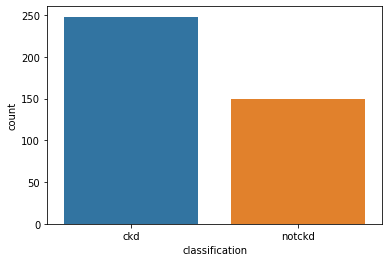

In [4]:
import seaborn as sns
ImpDf = dataframe.copy()
ImpDf.drop(ImpDf.index[ImpDf["classification"]=="ckd\t"], inplace = True)
sns.countplot("classification", data = ImpDf)

In [ ]:
ImpDf.shape

In [ ]:
#Converting all datatype into float32
ImpDf = pd.DataFrame({col: ImpDf[col].astype('category').cat.codes.astype('float32') for col in ImpDf}, index=ImpDf.index)
print(ImpDf.dtypes)

In [9]:
#Dividing Features and Label
X, y = ImpDf.drop('classification', axis = 1),ImpDf['classification']

# Imputation and Training with ML Pipeline **(Cross Validation)**

**Pipeline of KNN Inputation With ML Model**

In [10]:
# knn imputation transform for the dataset
from sklearn.impute import KNNImputer

#Random Forest model
from sklearn.ensemble import RandomForestClassifier

#Pipeline
from sklearn.pipeline import Pipeline



# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()

pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

**Implementation**

In [11]:
# from numpy import mean
# from numpy import std

# #Cross Validation
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold

# # define model evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# KNN Imputation with Different ML Algorithm **(Train-Test-Split)**

In [12]:
# fit on the dataset
imputer.fit(X)
# X.head(10)
# X.isnull().sum()
# transform the dataset
Xtrans = imputer.transform(X)


In [ ]:
import numpy as np
np.array(Xtrans)
#Xtrans.isnull().sum()

In [15]:
#Splitting data into train test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 15)


In [16]:
#Importing Classification Models
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
'''                             MODEL BUILDING                             '''
SVCmodel = SVC().fit(X_train, y_train)
# MNBmodel = MultinomialNB().fit(X_train, y_train)
GNBmodel = GaussianNB().fit(X_train,y_train)
DTmodel = DecisionTreeClassifier().fit(X_train, y_train)
RFmodel = RandomForestClassifier().fit(X_train, y_train)
LRmodel = LogisticRegression().fit(X_train, y_train)
KNNmodel = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(">>>>>>>>>>>>>>     Support Vector Machine     <<<<<<<<<<<<")
pred = SVCmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")

# print(">>>>>>>>>>>>>>     Multinomial Naive Bayes     <<<<<<<<<<<<")
# pred = MNBmodel.predict(X_test)
# score = accuracy_score(y_test,pred)
# print(score)
# conf = confusion_matrix(y_test,pred)
# print(conf)
# report = classification_report(y_test,pred)
# print(report)
# print(" ")

# print(">>>>>>>>>>>>>>     Gaussian Naive Bayes     <<<<<<<<<<<<")
# pred = GNBmodel.predict(X_test)
# score = accuracy_score(y_test,pred)
# print(score)
# conf = confusion_matrix(y_test,pred)
# print(conf)
# report = classification_report(y_test,pred)
# print(report)
# print(" ")

print(">>>>>>>>>>>>>>     Decission Tree      <<<<<<<<<<<<")
pred = DTmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")

print(">>>>>>>>>>>>>>     Random Forest     <<<<<<<<<<<<")
pred = RFmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")
print(">>>>>>>>>>>>>>     Logistic Regression     <<<<<<<<<<<<")
pred = LRmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")

>>>>>>>>>>>>>>     Support Vector Machine     <<<<<<<<<<<<
1.0
[[78  0]
 [ 0 54]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        54

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

 
>>>>>>>>>>>>>>     Decission Tree      <<<<<<<<<<<<
1.0
[[78  0]
 [ 0 54]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        54

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

 
>>>>>>>>>>>>>>     Random Forest     <<<<<<<<<<<<
1.0
[[78  0]
 [ 0 54]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
   

In [19]:
print(">>>>>>>>>>>>>>     Gaussian Naive Bayes     <<<<<<<<<<<<")
pred = GNBmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")

>>>>>>>>>>>>>>     Gaussian Naive Bayes     <<<<<<<<<<<<
0.9393939393939394
[[76  2]
 [ 6 48]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        78
         1.0       0.96      0.89      0.92        54

    accuracy                           0.94       132
   macro avg       0.94      0.93      0.94       132
weighted avg       0.94      0.94      0.94       132

 
